In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D 
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1) / 255
x_test = x_test.reshape(10000, 28, 28, 1) / 255

11493376/11490434 [==============================] - 0s 0us/step


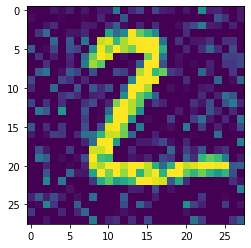

In [21]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Print one image to see the noise
plt.imshow(x_test_noisy[1].reshape(28, 28))

In [22]:
input_img = Input(shape=(28, 28, 1))

nn = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
nn = MaxPooling2D((2, 2), padding='same')(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
encoded = MaxPooling2D((2, 2), padding='same')(nn)

In [25]:
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
nn = UpSampling2D((2, 2))(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
nn = UpSampling2D((2, 2))(nn)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(nn)

In [32]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=256,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1348 - val_loss: 0.1334
Epoch 2/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1343 - val_loss: 0.1330
Epoch 3/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1339 - val_loss: 0.1325
Epoch 4/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1335 - val_loss: 0.1321
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1331 - val_loss: 0.1317
Epoch 6/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1326 - val_loss: 0.1312
Epoch 7/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1322 - val_loss: 0.1308
Epoch 8/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1318 - val_loss: 0.1304
Epoch 9/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1314 - val_loss: 0.1300
Epoch 10/100
235/235 [==============================] - 2s 10ms/step - loss: 0.131

In [33]:
result = autoencoder.predict((x_test_noisy[1].reshape(1, 28, 28, 1)))

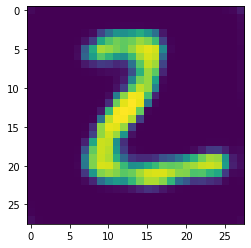

In [34]:
plt.imshow(result.reshape(28, 28))